# Noah Delano's Weekly Check-In: October 28th

### Problem I Am Proud Of:

For the problem I am proud of, I went with (3a from chapter 8.2 as I thought it was a really interesting way of using the Euler Method and it took me a few tries to get it right:

$(3a$ As a special case in which the Euler's method can be analyzed directly, consider Euler's method applied to

$$Y'(x)=Y(x), \hspace{1cm} Y(0)=1$$

The true solution is $e^x$. Show that the solution of Euler's Method can be written as

$$y_h(x_n)=(1+h)^{\frac{x_n}{h}}, \hspace{1cm} n\ge0$$

To start things off, lets just start simple, which is just stating how to write Euler's Method, which is as follows:

$$y_{n+1}=y_n+hf(x_n,y_n) \hspace{1cm} n=0,1,\ldots,n-1$$

Since we know that $y'=f(x,y)$ and $y'=y$ based on the eqution the problem gives, then we know that $f(x_n,y_n)=y_n$. So our euler method can be rewritten as:

$$y_{n+1}=y_n+hy_n$$

Now to simplify:

$$y_{n+1}=(1+h)y_n$$

Now say we solve for $y_n$:

$$y_{n}=y_{n-1}+hf(x_{n-1},y_{n-1})$$

If $y'=y$, then $y_{n-1}=y_n$. So:

$$y_{n}=y_{n-1}+hy_n$$

$$y_{n}=y_{n-1}+hy_{n-1}$$

$$y_{n}=(1+h)y_{n-1}$$

Now lets sub $y_n$ back into $y_{n+1}$ above:

$$y_{n+1}=(1+h)(1+h)y_{n-1}$$

$$y_{n+1}=(1+h)^2y_{n-1}$$

Now we can see a pattern starting to occur. Therefore, after further devising of $y_{n-1}$ to $y_0$, we should get:

$$y_{n+1}=(1+h)^{n+1}y_0$$
or
$$y(x_{n+1})=(1+h)^{n+1}y(x_n)$$

And since we are given the initial condition of $y(0)=1$, then

$$y(x_{n+1})=(1+h)^{n+1}$$

If we were to shift our method, such that $n\ge0$, then the above equation can be rewritten as

$$y(x_{n})=(1+h)^{n}$$

Now the last thing we are missing to match this with the equation stated at the beginning, we need to find a substitute for n. Now we know that $x_0$ approaches $x_n$ by steps of h. So for this to occur, n steps must be taken to get from $x_0$ to $x_n$. Therefore:

$$x_n=x_0+nh$$

Based on our initial condition, we know that $x_0=0$. Therefore:

$$x_n=nh$$

Which can be rewritten as

$$n=\frac{x_n}{h}$$.

Therefore:

$$y(x_{n})=(1+h)^{\frac{x_n}{h}}$$

I know that the process may look simple, but this was a new way for me of using the newton method, almost in a backwards iteration form. So it definetly took me awhile to solve, but once I did, I was quite proud of myself.

### Problem I Struggled With:

The concepts behinf the Euler Method came pretty easy to me, mostly because I have seen it before through subjects like calculus. Therefore, I though it be fun to look into some other forms of it or possibly applications. Fun fact I found was that in the movie "Hidden Figures," apparently it was Euler's Method that Katherine Goble used in order to help the astronaut John Green's re-entry into orbit after his expidion around the globe. I have seen that movie many times and never caught that until I saw wikepedia reference it, which I thought was hilarious. But other than that application, I decided to look at another form of approximation, other than the Euler Method. I discovered a method called the Heuns Method, which is honestly derived by Euler's. In simple terms (for my sake), Heuns Method uses slope of one point and the slope of the next point, then averages both slopes. 

I first started off by creating a simple diagram of what we are trying too solve

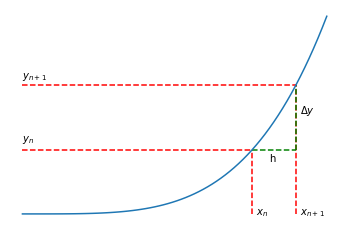

<Figure size 1440x1440 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#I just picked random values, so this doesn't really need to be looked at in detail. Just examine the graph for now
xvals = np.arange(0,7,0.1)
y=[]
for i in range(len(xvals)):
    y.append((1/4)*(xvals[i])**4)
yvals=np.array(y)

plt.plot(xvals,yvals)

plt.vlines(5.2,0,(1/4)*(5.2)**4,colors='r', linestyles='dashed')
plt.text(5.3,0,'$x_n$',fontsize=10)

plt.hlines((1/4)*(5.2)**4,0,5.2,colors='r', linestyles='dashed')
plt.text(0,210,'$y_n$',fontsize=10)

plt.vlines(6.2,0,(1/4)*(6.2)**4,colors='r', linestyles='dashed')
plt.text(6.3,0,'$x_{n+1}$',fontsize=10)

plt.hlines((1/4)*(6.2)**4,0,6.2,colors='r', linestyles='dashed')
plt.text(0,390,'$y_{n+1}$',fontsize=10)

plt.hlines((1/4)*(5.2)**4,5.2,6.2,colors='g',linestyles='dashed')
plt.text(5.6,150,'h', fontsize=10)

plt.vlines(6.2,(1/4)*(5.2)**4,(1/4)*(6.2)**4,colors='g',linestyles='dashed')
plt.text(6.3,290,'$\Delta y$', fontsize=10)


plt.axis('off')
plt.figure(figsize=(20,20))
plt.show()


When solving using the eulers method, we would simply find $y_{n+1}=y_n+hy_n'$. But, one of the doensides of the method is that it primarily looks at the slope at the initial point of $(x_n,y_n)$, then goes to the next point at h step. However, when using heuns method, we are taking the slope at $(x_n,y_n)$, as well as the slope at $(x_{n+1},y_{n+1})$ and take the average between them, and thereby getting an ideal slope between the two points.

First lets find the slope at $(x_n,y_n)$ by just using the euler method:

$$slopeLEFT=y_n'=f(x_n,y_n)$$

Now we want to get the slope of $(x_{n+1},y_{n+1})$, which we can get by taking our h step. Therefore, by euler,

$$slopeRIGHT=y_{n+1}'=f(x_{n+1},y_{n+1})=f(x_n+h,y_n+hf(x_n,y_n))$$

Based on the diagram above, the ideal slope we would like to achieve is $\frac{\Delta y}{h}$, or rather $\Delta y=h*avgSLOPE$. So in order to solve for $y_{n+1}$, then $y_{n+1}=y_n+\Delta y$. Therefore:

$$y_{n+1}=y_n+h*avgSLOPE$$

Now we can find the ideal slope simply by taking the average of both the left and right:

$$y_{n+1}=y_n+h\left[\frac{slopeLEFT+slopeRIGHT}{2}\right]$$

$$y_{n+1}=y_n+\frac{h}{2}\left[f(x_n,y_n)+f(x_n+h,y_n+hf(x_n,y_n))\right]$$

And this is how to use the Huens Method. Now let me show an example, using the function the professor used:

$$y'=\frac{y+x^2-2}{x+1} \hspace{1cm} y(0)=2$$

In [2]:
def f(x,y):
    return (y+x**2-2)/(x+1)

def real_answer(x):
    #real answer provided by the professor in order to examine the error
    return x**2+2*x+2-2*(x+1)*np.log(x+1)

In [3]:
#define the heuns method, given a set of x values, the initial condition, and an h value for step size
def heuns_method(xvals,y0,h,yreal=None,show=True):
    #Initialize y values
    y=[y0]
    #for each xvalue we are examining
    for i in range(1,len(xvals)):
        
        #Use the Euler method to find the slope of both the initial point, then the point after the h step
        slopeLeft = f(xvals[i-1],y[i-1])
        slopeRight = f(xvals[i-1]+h,y[i-1]+(h*slopeLeft))
        
        #Take the average of the slopes, and apply eulers method again
        y.append(y[i-1]+(h/2)*(slopeLeft+slopeRight))
        
    y = np.array(y)

    #Used the basic plotting code from the professor just for easier transition
    if yreal is not None:
        #absolute difference between approx and the real answer
        error = np.abs(yreal-y)
        if show == True:
            #plot the real answer
            plt.plot(xvals,yreal, 'k.',label='real')
            #plot my approx using the Heuns method
            plt.plot(xvals,y, 'b',label='Heuns')
            plt.legend()
            plt.grid()
            plt.title('Heuns method vs. Real Solution')
            plt.show()

            #Plot my error as x increases
            plt.plot(xvals,error, 'r')
            plt.title('Error in Heuns method')
            plt.grid()
            plt.show()

            DF = pd.DataFrame({'y' : y, 'error' : error},index=xvals)
            display(DF)
    else:
        error = False
        if show == True:
            plt.plot(xvals,y, 'b',label='Heuns')
            plt.legend()
            plt.grid()
            plt.title('Heuns method')
            plt.show()        

    return y, error

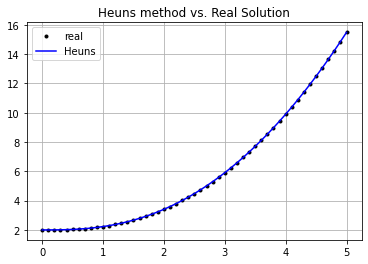

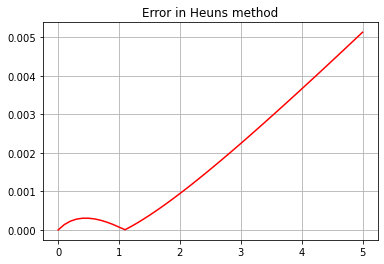

,y,error
0.0,2.000000,0.000000
0.1,2.000455,0.000137
0.2,2.002655,0.000227
0.3,2.008133,0.000280
0.4,2.018181,0.000304
0.5,2.033909,0.000304
0.6,2.056273,0.000285
0.7,2.086114,0.000250
0.8,2.124170,0.000202
0.9,2.171097,0.000142


In [4]:
#Set my initial conditions
x0 = 0
y0 = 2
xend = 5
#Step size of 0.1
h = .1
xvals = np.arange(x0,xend+h,h)

#Gets my real x and y values
yreal = real_answer(xvals)

#Apply heuns y the x values and compares it to the real answer
yvals,error = heuns_method(xvals,y0,h,yreal=yreal)

Based on the graphs above, this method does pretty good, looking to be almost entirely equivalent to the real function. Now the only part that I may have gotten a bit confused on is why that little hump occurs within the error function as it is very abrupt. But other than that, I believe huens is a great method as a subsitute for eulers in approximation

### How I Contributed to My Group

Hopefully this will be the last time, but I did miss class on Friday due to something weird with my phone and microsoft teams. I was out of town, and mistakenly forgot my laptop, which I couldn't get to until later in the day. When I tried attending the session, teams kept crashing on my phone for no explainable reason. It got to the point where I just gave up, and just listened to the recording. But when we had class on Monday, I got back into the action. Sadly, it was primarily Kimberley and I talking and discussing the topics we had gone over. One of my biggest contributions was heping Kimberley on some of her code. Apparently when she was attempting one of the homework problems, the while loop she had created in order to decrease the error would not stop running. Upon closer examination, I saw that the issue was in the stability of the h value she chose. One of the things we discussed in class was a factor of lambda to our h steps, creating a range for how big our h steps can be. Her h value was set out of the range, making the error a negative value, which onviously can never happen. So I showed her what the range was based on the problem, allowing the program the finish insstantly. I didn't have much issue luckily, so most of our time was spent talking about her program.

### My Goals For Next Week

I honestly am not quite sure what I want to accomplish by next week. I know I have missed a few classes, but were mainly due to unavoidable circumstances. Beyond making sure I am at each class prepared and ready to work, I really need to remember to upload my pre-class preperation as that is where I am losing points in the class. I honestly just usually forget, but I need to get in the habbit of taking my work, scanning it, and uploading it to my group in order to get those points. Then during the class session, bring up any questions I may have had on the topic, which I have been getting better at. Honestly, I have really enjoyed working with Kimberley. She is fun to talk to and I feel like our minds working similarly as it seems like we usually have similar questions. But besides that, I just need to improve my pre-class preperation.